<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/0116(%EB%B3%B4%EC%99%843).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2 

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df_train = pd.read_csv("/content/drive/MyDrive/파이썬/train(building).csv", encoding = "cp949")
df_train = pd.DataFrame(df_train)
df_train

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [ ]:
pd.DataFrame(df_train.isnull().sum())

In [ ]:
df_train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [65]:
df_test = pd.read_csv("/content/drive/MyDrive/파이썬/test(building).csv", encoding = "cp949")
df_test = pd.DataFrame(df_test)
df_test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [ ]:
df_test.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [66]:
df_train = df_train[['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN','Y_LABEL']]

In [ ]:
df_train

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [ ]:
df_train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

In [67]:
Y_train = df_train["Y_LABEL"]
X_train = df_train.drop(["Y_LABEL"],axis = 1)

In [ ]:
Y_train

In [68]:
X_test = df_test

In [69]:
Y_test = pd.read_csv("/content/drive/MyDrive/파이썬/sample_submission(building).csv", encoding = "cp949")
Y_test = pd.DataFrame(Y_test)
Y_test

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [70]:
X_train = X_train.drop(["ID", "COMPONENT_ARBITRARY"],axis = 1)

In [ ]:
X_test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [71]:
X_test = X_test.drop(["ID", "COMPONENT_ARBITRARY"],axis = 1)

In [72]:
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [73]:
selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state=0), threshold= "median")
selector.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='median')

In [74]:
score = pd.DataFrame()
#score["Chi2"] = selector.scores_
#score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,support,attribute
0,True,ANONYMOUS_1
1,True,YEAR
2,True,ANONYMOUS_2
6,True,CU
7,True,FE
10,True,MO
12,True,PQINDEX
15,True,V40
16,True,ZN


In [ ]:
X_train

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.000000,75
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.000000,652
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.600000,412
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.300000,7
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.100000,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,2629,2013,200,0,0,0,7,4,0.0,0,0,0,16,0,0,60.304718,500
25780,1691,2011,200,0,0,3,0,148,0.0,1,0,0,151,0,0,134.857076,10
25781,2012,2009,200,0,0,2,25,142,0.0,2,0,1,196,0,0,150.913051,24
25782,6015,2015,200,0,0,0,0,5,0.0,0,12,0,6,0,0,128.044593,1227


In [ ]:
X_test

array([[ 0.58934425,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.66806502,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.91954688,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08638054,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.16510131,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58934425,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
X_train = X_train[["ANONYMOUS_1", "YEAR", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]]

In [ ]:
X_train

,ANONYMOUS_1,YEAR,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN
0,1486,2011,200,78,888,1,8504,154.000000,75
1,1350,2021,375,31,2,0,19,44.000000,652
2,2415,2015,200,2,4,0,17,72.600000,412
3,7389,2010,200,1,37,0,44,133.300000,7
4,3954,2015,200,0,71,0,217,133.100000,128
...,...,...,...,...,...,...,...,...,...
25779,2629,2013,200,7,4,0,16,60.304718,500
25780,1691,2011,200,0,148,0,151,134.857076,10
25781,2012,2009,200,25,142,0,196,150.913051,24
25782,6015,2015,200,0,5,12,6,128.044593,1227


In [76]:
X_test = X_test[["ANONYMOUS_1", "YEAR", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]]


In [ ]:
X_test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,3199.140871,2013.656514,392.669922,37.397285,198.615295,25.042212,475.091210,110.495135,581.186393
std,4834.849930,3.976759,563.705290,153.922102,690.985612,62.245538,1812.652841,45.381679,530.799040
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,1667.000000,2010.000000,200.000000,1.000000,15.000000,0.000000,12.000000,73.000000,38.000000
50%,2271.000000,2014.000000,200.000000,4.000000,41.000000,1.000000,30.000000,112.100000,489.000000
75%,3842.000000,2017.000000,417.000000,17.000000,143.000000,8.000000,173.000000,138.200000,1115.000000
max,239570.000000,2022.000000,9650.000000,4113.000000,30407.000000,765.000000,48976.000000,388.400000,1932.000000


In [77]:
cg = ["YEAR"]
num= ["ANONYMOUS_1", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]

In [ ]:
X_test

In [51]:
X_train

,ANONYMOUS_1,YEAR,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN
0,1486,2011,200,78,888,1,8504,154.000000,75
1,1350,2021,375,31,2,0,19,44.000000,652
2,2415,2015,200,2,4,0,17,72.600000,412
3,7389,2010,200,1,37,0,44,133.300000,7
4,3954,2015,200,0,71,0,217,133.100000,128
...,...,...,...,...,...,...,...,...,...
25779,2629,2013,200,7,4,0,16,60.304718,500
25780,1691,2011,200,0,148,0,151,134.857076,10
25781,2012,2009,200,25,142,0,196,150.913051,24
25782,6015,2015,200,0,5,12,6,128.044593,1227


In [78]:
X_train['YEAR'].value_counts() # 데이터 확인

2008    2756
2009    2510
2014    2419
2012    2394
2011    2353
2013    2316
2010    2152
2015    1964
2016    1398
2017    1294
2018    1188
2019     875
2007     620
2021     574
2020     533
2022     438
Name: YEAR, dtype: int64

In [ ]:
df_train['Embarked'] = df_train['Embarked'].astype('category') # 데이터 타입 변경
df_train['Embarked'].value_counts() # 데이터 확인

In [79]:
ct = ColumnTransformer([("scaling", StandardScaler(), num), ("onehot", OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
#ct.fit(X_test)
X_test = ct.transform(X_test)

In [81]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.500661,-0.315210,0.306239,1.206867,-0.392932,4.938020,0.932650,-0.933374,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.536389,0.050056,-0.044576,-0.358981,-0.410368,-0.271228,-1.451014,0.162874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.256610,-0.315210,-0.261036,-0.355447,-0.410368,-0.272456,-0.831261,-0.293104,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.050077,-0.315210,-0.268500,-0.297125,-0.410368,-0.255879,0.484088,-1.062567,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.147691,-0.315210,-0.275964,-0.237036,-0.410368,-0.149668,0.479754,-0.832678,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,-0.200391,-0.315210,-0.223715,-0.355447,-0.410368,-0.273069,-1.097696,-0.125912,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25780,-0.446807,-0.315210,-0.275964,-0.100952,-0.410368,-0.190188,0.517829,-1.056868,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25781,-0.362479,-0.315210,-0.089361,-0.111556,-0.410368,-0.162561,0.865757,-1.030269,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25782,0.689123,-0.315210,-0.275964,-0.353679,-0.201140,-0.279209,0.370205,1.255321,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(16) :
  print(i+8);
  print(X_train[i+8].value_counts())

In [91]:
X_train2= X_train2.rename(columns={ 0 : 'ANONYMOUS_1', 1 :"ANONYMOUS_2",2 :  "CU", 3 : "FE", 4 : "MO", 5 : "PQINDEX", 6 : "V40", 7 : "ZN",
                                   8 : "2007", 9 : "2008", 10 :"2009", 11 : "2010", 12 : "2011", 13 : "2012", 14 : "2013", 15 : "2014", 16 : "2015", 17 : "2016",
                                   18 : "2017", 19 : "2018", 20 : "2019", 21 : "2020", 22 : "2021", 23 : "2022"}) # 데이터 합치기

In [92]:
X_train2 = pd.DataFrame(X_train2)
X_train2

,ANONYMOUS_1,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.500661,-0.315210,0.306239,1.206867,-0.392932,4.938020,0.932650,-0.933374,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.536389,0.050056,-0.044576,-0.358981,-0.410368,-0.271228,-1.451014,0.162874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.256610,-0.315210,-0.261036,-0.355447,-0.410368,-0.272456,-0.831261,-0.293104,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.050077,-0.315210,-0.268500,-0.297125,-0.410368,-0.255879,0.484088,-1.062567,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.147691,-0.315210,-0.275964,-0.237036,-0.410368,-0.149668,0.479754,-0.832678,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,-0.200391,-0.315210,-0.223715,-0.355447,-0.410368,-0.273069,-1.097696,-0.125912,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25780,-0.446807,-0.315210,-0.275964,-0.100952,-0.410368,-0.190188,0.517829,-1.056868,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25781,-0.362479,-0.315210,-0.089361,-0.111556,-0.410368,-0.162561,0.865757,-1.030269,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25782,0.689123,-0.315210,-0.275964,-0.353679,-0.201140,-0.279209,0.370205,1.255321,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_train= X_train.rename(columns={ 0 : 'ANONYMOUS_1', 1 :"ANONYMOUS_2",2 :  "CU", 3 : "FE", 4 : "MO", 5 : "PQINDEX", 6 : "V40", 7 : "ZN",
                                   8 : "2007", 9 : "2008", 10 :"2009", 11 : "2010", 12 : "2011", 13 : "2012", 14 : "2013", 15 : "2014", 16 : "2015", 17 : "2016",
                                   18 : "2017", 19 : "2018", 20 : "2019", 21 : "2020", 22 : "2021", 23 : "2022"}) # 데이터 합치기

In [94]:
cg = ["YEAR"]
num= ["ANONYMOUS_1", "ANONYMOUS_2", "CU","FE", "MO", "PQINDEX", "V40", "ZN"]

In [96]:
Y_test = Y_test["Y_LABEL"]

In [ ]:
Y_test

0       0
1       0
2       0
3       0
4       0
       ..
6036    0
6037    0
6038    0
6039    0
6040    0
Name: Y_LABEL, Length: 6041, dtype: int64

In [97]:
logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

print("R2 : {:.3f}" .format(logit.score(X_train, Y_train)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)                       

R2 : 0.634
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.58      6041
   macro avg       0.50      0.29      0.37      6041
weighted avg       1.00      0.58      0.73      6041

[-0.22811471]
[[ 0.50465137 -0.12203755 -0.04218425  0.13263458 -0.04537678 -0.00973344
   0.01583053 -0.02345084  0.48440598  0.56408076  1.09997504  0.9429471
   0.48183839  0.54841814  0.2982358   0.06785135 -0.02209384 -0.39299987
  -0.48602102 -0.64173234 -0.73479326 -0.51163966 -1.10431642 -0.81304134]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

In [98]:
X_train.columns

Index(['ANONYMOUS_1', 'ANONYMOUS_2', 'CU', 'FE', 'MO', 'PQINDEX', 'V40', 'ZN',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [116]:
len(X_train.columns)

24

In [111]:
logit_coef = pd.DataFrame(logit.coef_)
logit_coef

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.504651,-0.122038,-0.042184,0.132635,-0.045377,-0.009733,0.015831,-0.023451,0.484406,0.564081,...,0.298236,0.067851,-0.022094,-0.393,-0.486021,-0.641732,-0.734793,-0.51164,-1.104316,-0.813041


In [112]:
logit_coef.columns = X_train.columns

In [115]:
logit_coef

,ANONYMOUS_1,ANONYMOUS_2,CU,FE,MO,PQINDEX,V40,ZN,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.504651,-0.122038,-0.042184,0.132635,-0.045377,-0.009733,0.015831,-0.023451,0.484406,0.564081,...,0.298236,0.067851,-0.022094,-0.393,-0.486021,-0.641732,-0.734793,-0.51164,-1.104316,-0.813041


In [60]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.500661,-0.315210,0.306239,1.206867,-0.392932,4.938020,0.932650,-0.933374,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.536389,0.050056,-0.044576,-0.358981,-0.410368,-0.271228,-1.451014,0.162874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.256610,-0.315210,-0.261036,-0.355447,-0.410368,-0.272456,-0.831261,-0.293104,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.050077,-0.315210,-0.268500,-0.297125,-0.410368,-0.255879,0.484088,-1.062567,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.147691,-0.315210,-0.275964,-0.237036,-0.410368,-0.149668,0.479754,-0.832678,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,-0.200391,-0.315210,-0.223715,-0.355447,-0.410368,-0.273069,-1.097696,-0.125912,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25780,-0.446807,-0.315210,-0.275964,-0.100952,-0.410368,-0.190188,0.517829,-1.056868,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25781,-0.362479,-0.315210,-0.089361,-0.111556,-0.410368,-0.162561,0.865757,-1.030269,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25782,0.689123,-0.315210,-0.275964,-0.353679,-0.201140,-0.279209,0.370205,1.255321,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy : 0.802
              precision    recall  f1-score   support

           0       1.00      0.66      0.79      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.66      6041
   macro avg       0.50      0.33      0.40      6041
weighted avg       1.00      0.66      0.79      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)

Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.626
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.53      6041
   macro avg       0.50      0.26      0.35      6041
weighted avg       1.00      0.53      0.69      6041



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division

In [119]:
feature_name = X_train.columns
feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance,feature_name), reverse = True)

[(0.3299098802763041, 'ANONYMOUS_1'),
 (0.21720487980349268, 'ANONYMOUS_2'),
 (0.16967825002945092, '2009'),
 (0.09339306079910566, '2008'),
 (0.09045640423133394, '2016'),
 (0.0790577816207372, 'FE'),
 (0.02029974323957549, 'CU'),
 (0.0, 'ZN'),
 (0.0, 'V40'),
 (0.0, 'PQINDEX'),
 (0.0, 'MO'),
 (0.0, '2022'),
 (0.0, '2021'),
 (0.0, '2020'),
 (0.0, '2019'),
 (0.0, '2018'),
 (0.0, '2017'),
 (0.0, '2015'),
 (0.0, '2014'),
 (0.0, '2013'),
 (0.0, '2012'),
 (0.0, '2011'),
 (0.0, '2010'),
 (0.0, '2007')]

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["정상", "이상"],
                feature_names = feature_name, impurity=True, filled = True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [139]:
logit_model = LogisticRegression(C=1, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=9)
dt_model = DecisionTreeClassifier(random_state=0, max_depth=3)
logit_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
logit_Y_pred = logit_model.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)
print("logit score : {:.3f}".format(logit_model.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train, Y_train)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


logit score : 0.634
knn score : 0.802
dt score : 0.626


In [140]:
print(classification_report(Y_test, logit_Y_pred))
print(classification_report(Y_test, knn_Y_pred))
print(classification_report(Y_test, dt_Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.58      6041
   macro avg       0.50      0.29      0.37      6041
weighted avg       1.00      0.58      0.73      6041

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.66      6041
   macro avg       0.50      0.33      0.40      6041
weighted avg       1.00      0.66      0.79      6041

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.53      6041
   macro avg       0.50      0.26      0.35      6041
weighted avg       1.00      0.53      0.69      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

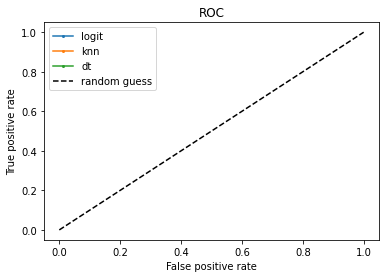

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


fpr1, tpr1, threshold = roc_curve(Y_test, logit_model.decision_function(X_test))
fpr2, tpr2, threshold = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])

#ROC
plt.plot(fpr1, tpr1, 'o-', ms=2, label = "logit")
plt.plot(fpr2, tpr2, 'o-', ms=2, label = "knn")
plt.plot(fpr3, tpr3, 'o-', ms=2, label = "dt")
plt.plot([0,1], [0,1],"k--", label = "random guess")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.show()

In [142]:
logit_model_auc = roc_auc_score(Y_test, logit_model.decision_function(X_test)) 
knn_model_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
dt_model_acu = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])
print("logit AUC score: {:.3f}".format(logit_model_auc))
print("knn AUC score: {:.3f}".format(knn_model_auc))
print("dt AUC score: {:.3f}".format(dt_model_acu))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [128]:
#5. 모델링
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [129]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [0 1 1 ... 0 1 0]
accuracy(train) : 0.732
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.66      6041
   macro avg       0.50      0.33      0.40      6041
weighted avg       1.00      0.66      0.80      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from sklearn.svm import SVC

SVC_model = SVC(C=1, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
print("accuracy : {:.3f}".format(SVC_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


accuracy : 0.692
              precision    recall  f1-score   support

           0       1.00      0.62      0.77      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.62      6041
   macro avg       0.50      0.31      0.38      6041
weighted avg       1.00      0.62      0.77      6041



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB(var_smoothing = 0)
NB_model.fit(X_train, Y_train)
Y_pred = NB_model.predict(X_test)
print("accuracy : {:.3f}".format(NB_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.594
              precision    recall  f1-score   support

           0       1.00      0.34      0.51      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.34      6041
   macro avg       0.50      0.17      0.26      6041
weighted avg       1.00      0.34      0.51      6041



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter 

In [27]:
Y_pred = pd.DataFrame(Y_pred)

In [ ]:
Y_pred

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [ ]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=24, activation = "relu")) #dim : 차원, 열수. 
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7. 모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 200, 
                    batch_size = 64, verbose = 2)

Epoch 1/200
323/323 - 2s - loss: 0.6202 - accuracy: 0.6556 - val_loss: 0.8411 - val_accuracy: 0.4233 - 2s/epoch - 6ms/step
Epoch 2/200
323/323 - 1s - loss: 0.5893 - accuracy: 0.6851 - val_loss: 0.8101 - val_accuracy: 0.4553 - 812ms/epoch - 3ms/step
Epoch 3/200
323/323 - 1s - loss: 0.5794 - accuracy: 0.6921 - val_loss: 0.8176 - val_accuracy: 0.4706 - 788ms/epoch - 2ms/step
Epoch 4/200
323/323 - 1s - loss: 0.5728 - accuracy: 0.6941 - val_loss: 0.7878 - val_accuracy: 0.4887 - 757ms/epoch - 2ms/step
Epoch 5/200
323/323 - 1s - loss: 0.5680 - accuracy: 0.6999 - val_loss: 0.8100 - val_accuracy: 0.4799 - 691ms/epoch - 2ms/step
Epoch 6/200
323/323 - 1s - loss: 0.5639 - accuracy: 0.7003 - val_loss: 0.7865 - val_accuracy: 0.4985 - 755ms/epoch - 2ms/step
Epoch 7/200
323/323 - 1s - loss: 0.5594 - accuracy: 0.7043 - val_loss: 0.7883 - val_accuracy: 0.5092 - 816ms/epoch - 3ms/step
Epoch 8/200
323/323 - 1s - loss: 0.5562 - accuracy: 0.7112 - val_loss: 0.8128 - val_accuracy: 0.4867 - 768ms/epoch - 2ms/

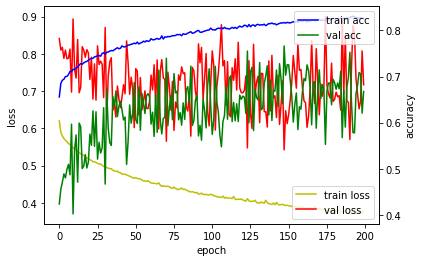

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [ ]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 확률: \n ", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 확률: 
  [[0.14614218]
 [0.9187778 ]
 [0.17699775]
 [0.03559577]
 [0.77825826]]
Y 예측 클래스 : 
  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.426
test accuracy : 0.435


In [ ]:
#5.단일모형 생성
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

#6.앙상블 모형 생성
model = VotingClassifier(estimators = [("K-NN", knn), ("Dtree", dtree)], voting = "soft")

#7.모형학습
model.fit(X_train, Y_train)

#8.예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting classifier accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
classifiers = [dtree, knn]
for classifier in classifiers :
    classifier.fit(X_train, Y_train)
    class_name = classifier.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, classifier.score(X_test,Y_test)))

Y predict value: 
 [0 0 0 ... 1 0 0]
voting classifier accuracy : 0.821
DecisionTreeClassifier accuracy : 0.782
KNeighborsClassifier accuracy : 0.684


In [ ]:
#5. 모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators = 300, max_depth = 3)

#6. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [0 1 1 ... 1 0 0]
accuracy(test) : 0.587
              precision    recall  f1-score   support

           0       1.00      0.59      0.74      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.59      6041
   macro avg       0.50      0.29      0.37      6041
weighted avg       1.00      0.59      0.74      6041



In [ ]:
#5.모형 생성
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#6.모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [0 0 0 ... 1 0 0]
accuracy(test) : 0.685
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      6041
           1       0.00      0.00      0.00         0

    accuracy                           0.69      6041
   macro avg       0.50      0.34      0.41      6041
weighted avg       1.00      0.69      0.81      6041

